In [1]:
import matplotlib.pyplot as plt
import numpy as np
import h5py
import time

plt.rcParams.update({'font.size': 18})

In [2]:
h5_file = "20240204-095058_pluto_50ohm.h5"

In [3]:
print ("Reading",h5_file)
hf = h5py.File(h5_file, 'r')

fc = hf["data"].attrs['fc']
fs = hf["data"].attrs['fs']
c  = hf["data"].attrs['c']
len_data = hf["data/timestamps"][()].shape[0]
print (len_data)

NFFT = 512
Nsamp = int(c)

auto11 = np.zeros(NFFT, dtype=np.complex64)
auto22 = np.zeros(NFFT, dtype=np.complex64)
cross12 = np.zeros(NFFT, dtype=np.complex64)

for i in range(len_data):
    a = hf["data/samples"][i][0][:]
    b = hf["data/samples"][i][1][:]

    for j in range(int(Nsamp/NFFT)):
        c1_fft = np.fft.fft(a[j*NFFT:(j+1)*NFFT])
        c2_fft = np.fft.fft(b[j*NFFT:(j+1)*NFFT])
        auto11 = auto11 + c1_fft*np.conj(c1_fft)
        auto22 = auto22 + c2_fft*np.conj(c2_fft)
        cross12 = cross12 + c1_fft*np.conj(c2_fft)
hf.close()

auto11 = np.fft.fftshift(auto11)
auto22 = np.fft.fftshift(auto22)
cross12 = np.fft.fftshift(cross12)


Reading 20240204-095058_pluto_50ohm.h5
9839


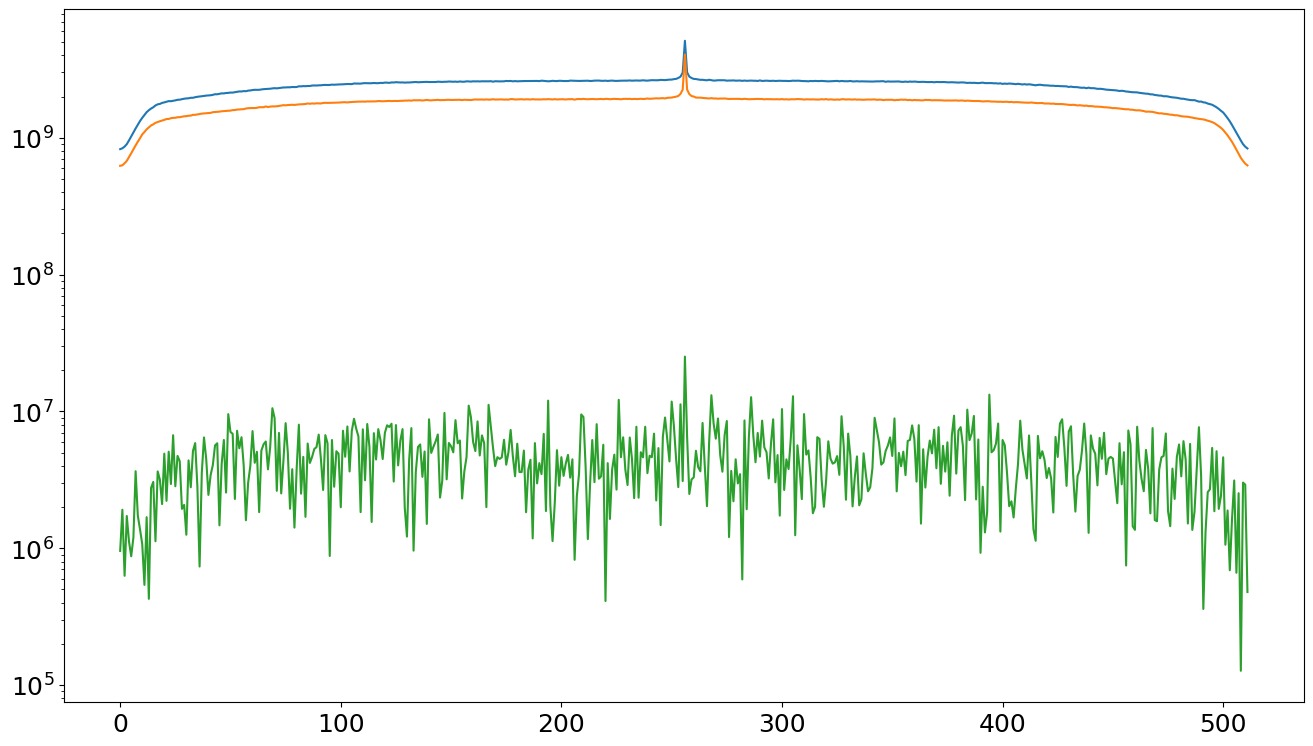

In [5]:
plt.figure(figsize=(16,9))
plt.semilogy(np.abs(auto11))
plt.semilogy(np.abs(auto22))
plt.semilogy(np.abs(cross12))